In [2]:
%cd ..

/home/anthony/workspace/yt-data


In [3]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1" # use cpu because I'm training on gpu

import cv2
import matplotlib.pyplot as plt
from thumbs.experiments.pokemon_conditional_outline import PokemonExperiment
from thumbs.viz import visualize_preprocessed_image, unnormalize_image
from thumbs.data import normalize_image

import tensorflow as tf


/home/anthony/workspace/yt-data/.venv/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Images in /home/anthony/workspace/yt-data/data/pokemon
['282-mega.jpg', '582.jpg', '340.jpg', '570.jpg', '136.jpg', '531-mega.jpg', '335.jpg', '96.jpg', '581.jpg', '153.jpg']
Found 820 total files
Found 819 jpgs


100%|██████████| 819/819 [00:00<00:00, 828.70it/s]


<Figure size 640x480 with 0 Axes>

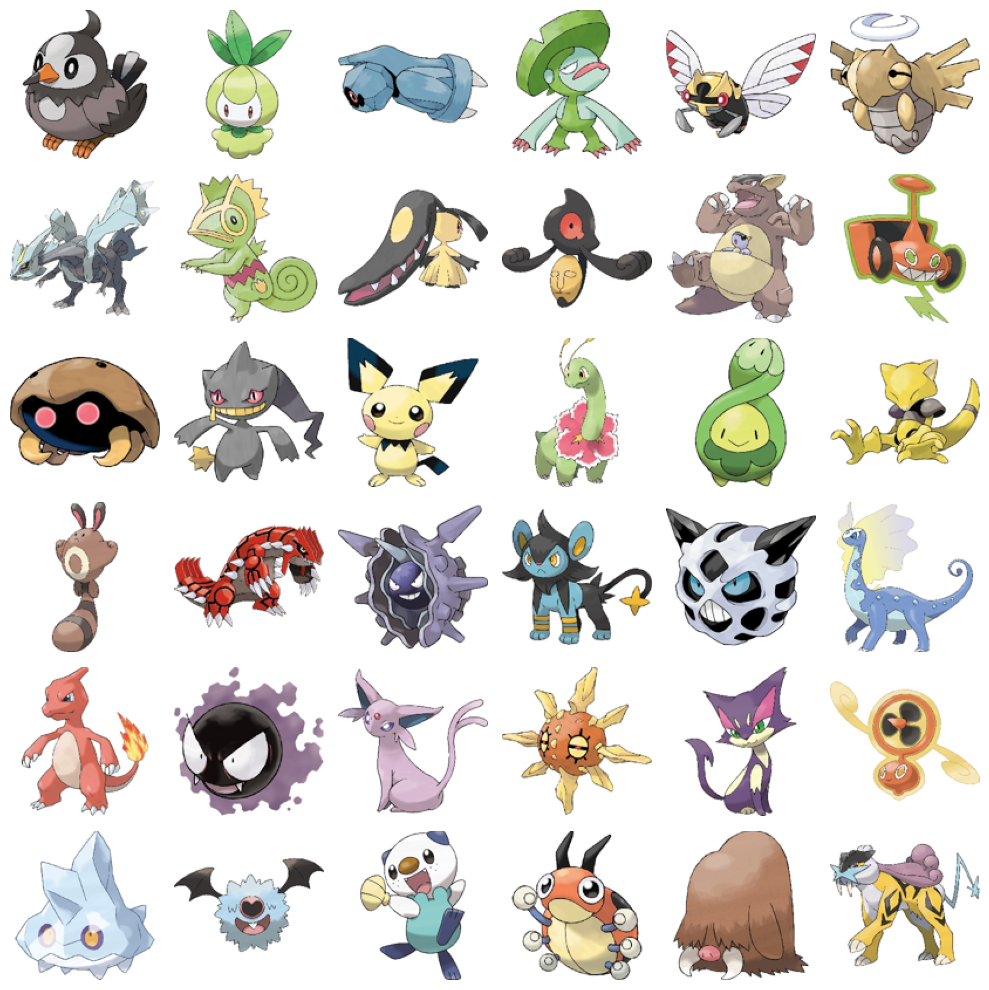

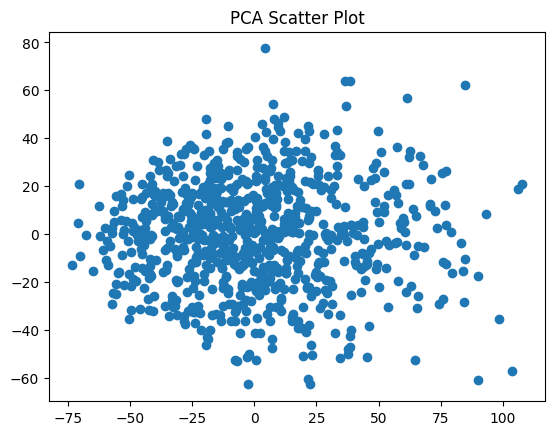

Model: "discriminator"
________________________________________________________________________________________________________________________________________________________________________________________________________
 Layer (type)                                                     Output Shape                                Param #                 Connected to                                                      
 input_1 (InputLayer)                                             [(None, 128, 128, 3)]                       0                       []                                                                
                                                                                                                                                                                                        
 input_2 (InputLayer)                                             [(None, 128, 128, 1)]                       0                       []                                     

2023-07-02 19:42:39.592751: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


Model: "generator"
________________________________________________________________________________________________________________________________________________________________________________________________________
 Layer (type)                                                     Output Shape                                Param #                 Connected to                                                      
 outline input (InputLayer)                                       [(None, 128, 128, 1)]                       0                       []                                                                
                                                                                                                                                                                                        
 conv2d_4 (Conv2D)                                                (None, 64, 64, 8)                           200                     ['outline input[0][0]']                    

BuiltModel(gan=None, discriminator=<keras.engine.functional.Functional object at 0x7f66b7b4f1f0>, discriminator_optimizer=<keras.optimizers.legacy.adam.Adam object at 0x7f66b7b49dc0>, generator=<keras.engine.functional.Functional object at 0x7f66b7a90e50>, generator_optimizer=<keras.optimizers.legacy.adam.Adam object at 0x7f66b7a8cca0>)

In [4]:
exp = PokemonExperiment()
exp.get_model(exp.get_mutable_params()[0]).build()

In [5]:
data = exp.get_data()
images = data[0]

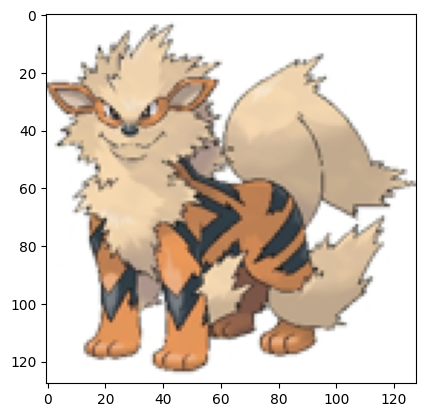

In [47]:
# Scale back to 0,2
import numpy as np
rand = np.random.randint(0, len(images)) 
image = unnormalize_image(images[rand])
plt.imshow(image)

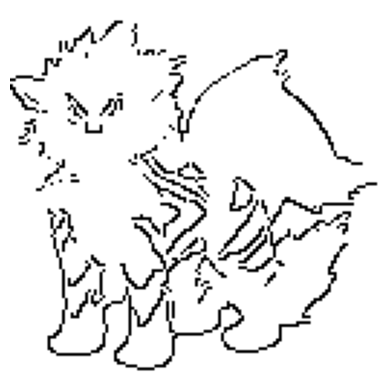

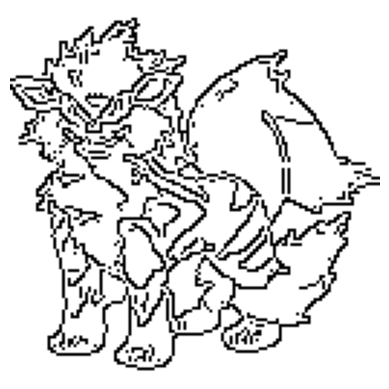

In [48]:
import numpy as np

def create_outline(image, threshold1=600, threshold2=None):
    thresholds = [10, 100, 400, 800, 1000]
    if threshold2 is None:
        threshold2 = np.random.choice(thresholds)

    edges = cv2.bitwise_not(cv2.Canny(image, threshold1=threshold1, threshold2=threshold2))
    edges = np.expand_dims(edges, axis=-1)
    return edges


edges = normalize_image(create_outline(image, threshold1=500, threshold2=600))
plt.imshow(edges, cmap='gray')
plt.axis('off')
plt.show()

edges2 = normalize_image(create_outline(image, threshold1=10, threshold2=200))
plt.imshow(edges2, cmap='gray')
plt.axis('off')
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

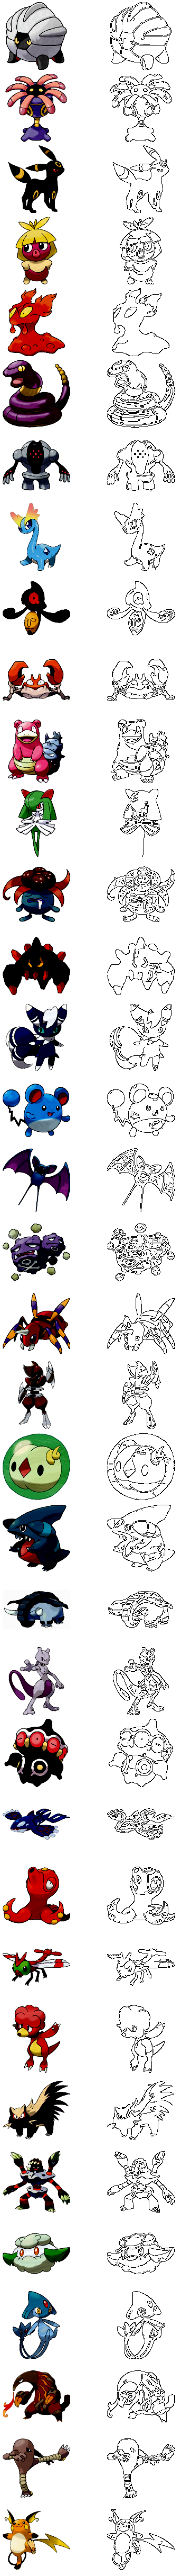

In [ ]:
# Pick 36 random images
random_indexes = np.random.choice(len(images), size=36, replace=False)
random_images = images[random_indexes]

# For each image, generate an outline
outlines = np.array([create_outline(unnormalize_image(image)) for image in random_images])

# plot then each as pairs side by side
fig, axes = plt.subplots(nrows=36, ncols=2, figsize=(10, 100))
for i in range(36):
    axes[i, 0].imshow(random_images[i])
    axes[i, 0].axis('off')
    axes[i, 1].imshow(outlines[i], cmap='gray')
    axes[i, 1].axis('off')
plt.subplots_adjust(wspace=0.0, hspace=0)
plt.tight_layout()
plt.show()
